In [24]:
import numpy as np
import pydicom
from matplotlib import pyplot as plt
from skimage.io import imread, imsave

from pydicom import dcmread
from pydicom.data import get_testdata_file

import struct
import json
import tifffile

def unpack_tag(data, tag):
    return struct.unpack('f', data[tag].value)[0]

233


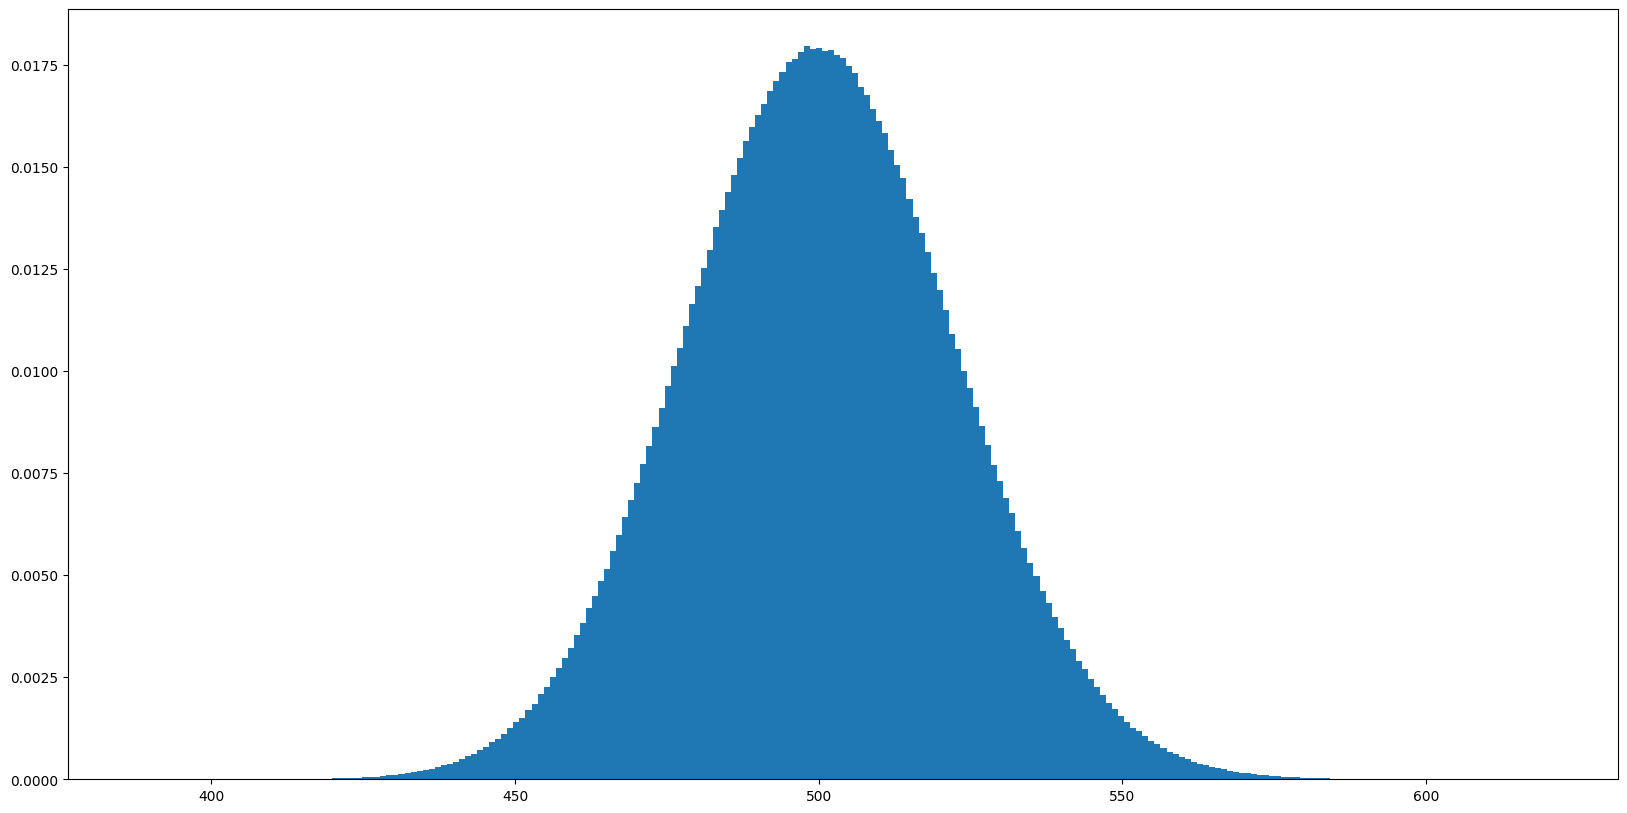

In [77]:
import numpy as np

s = np.random.poisson(500.25, 10000000)
plt.figure(figsize=(20, 10))
print(np.max(s) - np.min(s) + 1,)
count, bins, ignored = plt.hist(s, np.max(s) - np.min(s) + 1, density=True)

plt.show()

In [43]:
ds = dcmread("/home/ke/SGD/data/ACR_Recon_1mm_D45/R_ACR_GRANDCHALLENGE.CT.ABDOMEN_ABDOMENROUTINE_(ADULT).0009.0081.2016.02.18.10.56.16.495590.155319083.IMA")
print(ds)
# intercept = np.float64(ds.RescaleIntercept)
# slope = np.float64(ds.RescaleSlope)
# # hu_factor = unpack_tag(ds, 0x70411001)
# arr = ds.pixel_array.astype(np.float64) * slope + intercept
# arr = (arr-hu_factor)/hu_factor*1000

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.73013.30000016021816214046400001087
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.1.4
(0002, 0013) Implementation Version Name         SH: 'SIEMENS_S7VA48A'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.73013.30000016021816214046400001087
(0008, 0020) Study Date       

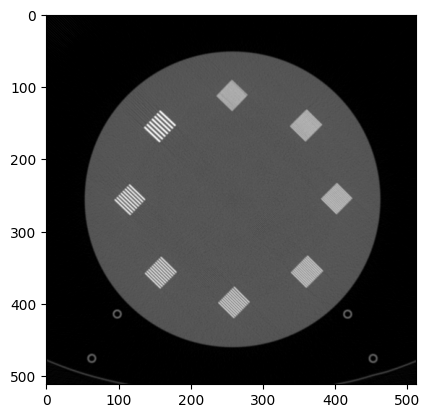

In [42]:
plt.imshow(arr, cmap='gray', vmax=2000, vmin=-1000)

In [30]:
arr[250]

array([-9.860e+02, -1.012e+03, -1.013e+03, -1.012e+03, -1.019e+03,
       -1.021e+03, -1.012e+03, -9.990e+02, -1.008e+03, -1.002e+03,
       -9.870e+02, -1.001e+03, -1.019e+03, -1.014e+03, -1.011e+03,
       -1.007e+03, -9.990e+02, -9.990e+02, -1.005e+03, -1.005e+03,
       -9.920e+02, -9.850e+02, -9.870e+02, -9.980e+02, -1.000e+03,
       -1.012e+03, -1.010e+03, -9.940e+02, -9.940e+02, -1.005e+03,
       -1.009e+03, -1.013e+03, -9.940e+02, -9.790e+02, -1.002e+03,
       -1.001e+03, -1.000e+03, -1.001e+03, -9.900e+02, -9.790e+02,
       -9.810e+02, -9.640e+02, -9.730e+02, -1.001e+03, -9.930e+02,
       -9.900e+02, -9.850e+02, -9.930e+02, -9.780e+02, -9.670e+02,
       -9.790e+02, -9.870e+02, -9.290e+02, -6.370e+02, -1.680e+02,
       -2.000e+01, -2.600e+01,  5.000e+00,  1.600e+01,  2.000e+00,
       -4.000e+00, -8.000e+00,  9.000e+00, -6.000e+00, -2.100e+01,
       -2.500e+01, -2.500e+01,  3.000e+00,  8.000e+00, -1.600e+01,
       -3.000e+00,  1.700e+01,  2.100e+01,  2.500e+01,  7.000e

In [16]:
def load_tiff_stack_with_metadata(file):
    '''

    :param file: Path object describing the location of the file
    :return: a numpy array of the volume, a dict with the metadata
    '''
    if not (file.endswith('.tif') or file.endswith('.tiff')):
        raise FileNotFoundError('File has to be tif.')
    with tifffile.TiffFile(file) as tif:
        data = tif.asarray()
        metadata = tif.pages[0].tags["ImageDescription"].value
    metadata = metadata.replace("'", "\"")
    try:
        metadata = json.loads(metadata)
    except:
        print('The tiff file you try to open does not seem to have metadata attached.')
        metadata = None
    return data, metadata

s, metadata = load_tiff_stack_with_metadata("../helix2fan/out/scan_001_flat_fan_projections.tif")
# plt.imshow(s[:, :, 30], cmap='gray')

angles = np.array(metadata['angles'])[:metadata['rotview']] + (np.pi / 2)
print(angles)

[-6.93768373 -6.93222967 -6.92677537 ... -0.67086085 -0.66540679
 -0.65995273]
